In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('Synthetic_SBA_Loans_more.csv')

In [7]:
df

,Applicant ID,Business Structure,Country,Location,NAICS,Business Ownership (1),Business Ownership (2),Business Ownership (3),Business Ownership (4),Business Ownership (5),...,Inventory Purchase,Real Estate Acquisition or Improvement,Business Acquisition or Buyout,Refinancing Existing Debt,Emergency Funds,Franchise Financing,Contract Financing,Licensing or Permits,Line of Credit Establishment,Eligibility
0,1,LLC,US,"Sterling Heights, MI",931190,100,0,0,0,0,...,False,False,True,False,False,True,True,True,False,[]
1,2,LLC,US,"Cleveland, OH",541511,69,31,0,0,0,...,True,False,True,False,False,False,False,False,False,[]
2,3,Franchise,US,"Springfield, MA",611420,100,0,0,0,0,...,False,True,False,True,True,True,True,True,False,[]
3,4,LLC,US,"New Orleans, LA",511110,100,0,0,0,0,...,False,True,True,True,True,False,False,False,True,[]
4,5,Franchise,US,"Bridgeport, CT",444130,100,0,0,0,0,...,True,True,False,False,True,False,False,True,True,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,9999996,Sole Proprietorship,US,"Boise, ID",532111,51,49,0,0,0,...,False,True,False,True,True,True,False,True,True,[]
9999996,9999997,Sole Proprietorship,US,"Salt Lake City, UT",931280,100,0,0,0,0,...,True,True,True,True,True,False,False,False,True,[]
9999997,9999998,S Corporation (S-Corp),US,"Winston-Salem, NC",722511,71,29,0,0,0,...,False,True,False,False,False,True,False,False,True,[]
9999998,9999999,LLC,US,"Naperville, IL",711320,71,29,0,0,0,...,False,True,False,False,True,True,False,True,True,['504']


In [8]:
df['Eligibility'].value_counts()

Eligibility
[]                 7892867
['504']            1126362
['7(a)', '504']     595656
['Express']         354581
['8(a)']             30534
Name: count, dtype: int64

In [9]:
# Create new target column
df['Target'] = df['Eligibility'].apply(lambda x: 1 if '7(a)' in x else 0)

# Verify results
print(df[['Eligibility', 'Target']].head())

  Eligibility  Target
0          []       0
1          []       0
2          []       0
3          []       0
4          []       0


In [10]:
df = df.drop(columns=['Eligibility', 'Applicant ID', 'Location'])

In [11]:
df = df.rename(columns={'Target': 'Eligibility'})

In [12]:
# Remove columns used in target creation
columns_to_drop = [
    "For Profit", 
    "Country", 
    "NAICS",
    "Personal Credit Score",
    "Business Credit Score",
    "DSCR (latest year)",
    "Industry Experience",
    "Fast Approval",
    "Loan Amount"
]

df = df.drop(columns=columns_to_drop, errors='ignore')

In [13]:
df.head().T

,0,1,2,3,4
Business Structure,LLC,LLC,Franchise,LLC,Franchise
Business Ownership (1),100,69,100,100,100
Business Ownership (2),0,31,0,0,0
Business Ownership (3),0,0,0,0,0
Business Ownership (4),0,0,0,0,0
Business Ownership (5),0,0,0,0,0
Annual Revenue (2 years ago),156000,2998000,4782000,3464000,2510000
Annual Revenue (1 year ago),4191000,3815000,1259000,3830000,238000
Annual Revenue (latest year),2991000,4696000,3249000,2447000,3131000
Net Profit Margin,22.94,18.94,26.51,84.54,69.1


In [14]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

Business Structure
['LLC' 'Franchise' 'S Corporation (S-Corp)' 'Sole Proprietorship'
 'Partnership']
8

Business Ownership (1)
[100  69  54  50  53]
58

Business Ownership (2)
[ 0 31 46 30 47]
32

Business Ownership (3)
[ 0 20 24 21 28]
15

Business Ownership (4)
[ 0 20 21 22 23]
7

Business Ownership (5)
[ 0 20]
2

Annual Revenue (2 years ago)
[ 156000 2998000 4782000 3464000 2510000]
4851

Annual Revenue (1 year ago)
[4191000 3815000 1259000 3830000  238000]
4851

Annual Revenue (latest year)
[2991000 4696000 3249000 2447000 3131000]
4851

Net Profit Margin
[22.94 18.94 26.51 84.54 69.1 ]
9954

Business Debt (2 years ago)
[ 142342 1731206 1096810  647066 1205191]
2993496

Business Debt (1 year ago)
[1072434 3738048  482000 2677042   79717]
2993949

Business Debt (latest year)
[ 398931  801432 1213186 1951544 3181781]
2993971

NOI (2 years ago)
[ 132378 2648745 1305203  854127 2097032]
3316612

NOI (1 year ago)
[1233299 3102579  453080 2114863  117183]
3318734

NOI (latest year)
[ 686

In [15]:
df.dtypes

Business Structure                         object
Business Ownership (1)                      int64
Business Ownership (2)                      int64
Business Ownership (3)                      int64
Business Ownership (4)                      int64
Business Ownership (5)                      int64
Annual Revenue (2 years ago)                int64
Annual Revenue (1 year ago)                 int64
Annual Revenue (latest year)                int64
Net Profit Margin                         float64
Business Debt (2 years ago)                 int64
Business Debt (1 year ago)                  int64
Business Debt (latest year)                 int64
NOI (2 years ago)                           int64
NOI (1 year ago)                            int64
NOI (latest year)                           int64
DSCR (2 years ago)                        float64
DSCR (1 year ago)                         float64
Managerial Experience                       int64
Years in Business                           int64


In [16]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import shap

In [17]:
# 1. Class Balancing
# Count class distribution
class_counts = df['Eligibility'].value_counts()

# Separate classes
majority_class = df[df['Eligibility'] == 0]
minority_class = df[df['Eligibility'] == 1]

# Undersample majority class
majority_undersampled = resample(majority_class,
                                 replace=False,
                                 n_samples=len(minority_class),
                                 random_state=42)

# Combine and shuffle
balanced_df = pd.concat([majority_undersampled, minority_class])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [18]:
class_counts

Eligibility
0    9404344
1     595656
Name: count, dtype: int64

In [19]:
balanced_df['Eligibility'].value_counts()

Eligibility
0    595656
1    595656
Name: count, dtype: int64

In [20]:
# 2. Data Preparation
# Convert bool columns to int
bool_cols = balanced_df.select_dtypes(include='bool').columns
balanced_df[bool_cols] = balanced_df[bool_cols].astype(int)

# Define features and target
X = balanced_df.drop(columns=['Eligibility'])
y = balanced_df['Eligibility']

In [21]:
# 3. Preprocessing Pipeline
categorical_features = ['Business Structure']

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [23]:
# Continue from In[17]
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import time

# 1. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True
)

# 2. Create GPU-accelerated pipeline
# Modified XGBClassifier configuration in the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(
        random_state=42,
        tree_method='hist',        # Updated to hist method
        device='cuda:0',           # Explicit device specification
        eval_metric='auc',
        enable_categorical=True,
        # GPU-specific optimizations
        sampling_method='gradient_based',
        max_bin=512
    ))
])

# Optimized parameter grid
param_grid = {
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__max_depth': [5, 7, 9, 11],
    'xgb__n_estimators': [200, 300, 500]
}

# 4. Perform Grid Search with GPU
start_time = time.time()
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=3,
    n_jobs=1  # Important: Set to 1 when using GPU
)
grid_search.fit(X_train, y_train)
print(f"GPU Grid search completed in {time.time()-start_time:.2f} seconds")

# 5. Retrieve best model
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_xgb = grid_search.best_estimator_

# 6. Evaluate on test set
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:,1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/home/starlord/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:11:12] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200;, score=0.686 total time=   1.7s
[CV 2/3] END xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200;, score=0.683 total time=   1.3s
[CV 3/3] END xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=200;, score=0.687 total time=   1.4s
[CV 1/3] END xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=300;, score=0.699 total time=   1.6s
[CV 2/3] END xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=300;, score=0.697 total time=   1.7s
[CV 3/3] END xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=300;, score=0.697 total time=   1.6s
[CV 1/3] END xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=500;, score=0.701 total time=   2.3s
[CV 2/3] END xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=500;, score=0.700 total time=   2.4s
[CV 3/3] END xgb__learning_rate=0.01, xgb__max_depth=5, xgb__n_estimators=500;, score=0.699 total time=   2.5s
[

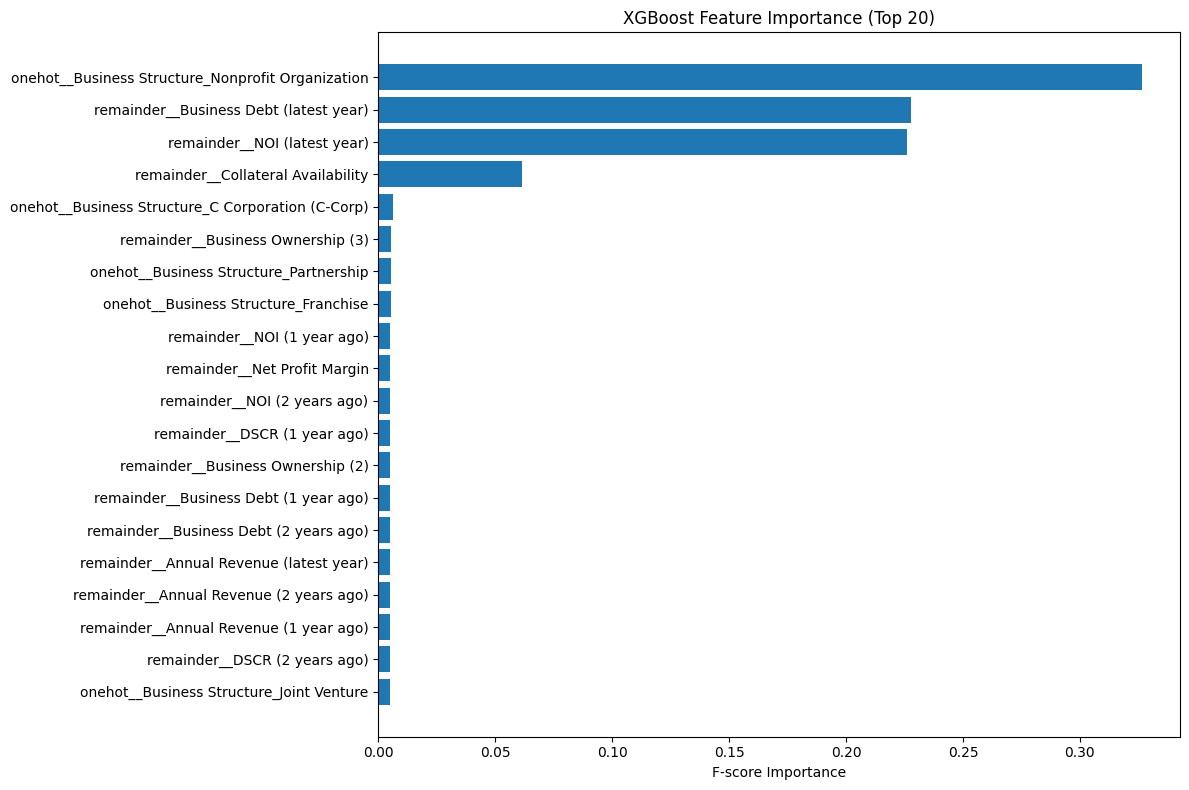

/home/starlord/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:15:33] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/home/starlord/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [09:15:33] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- 

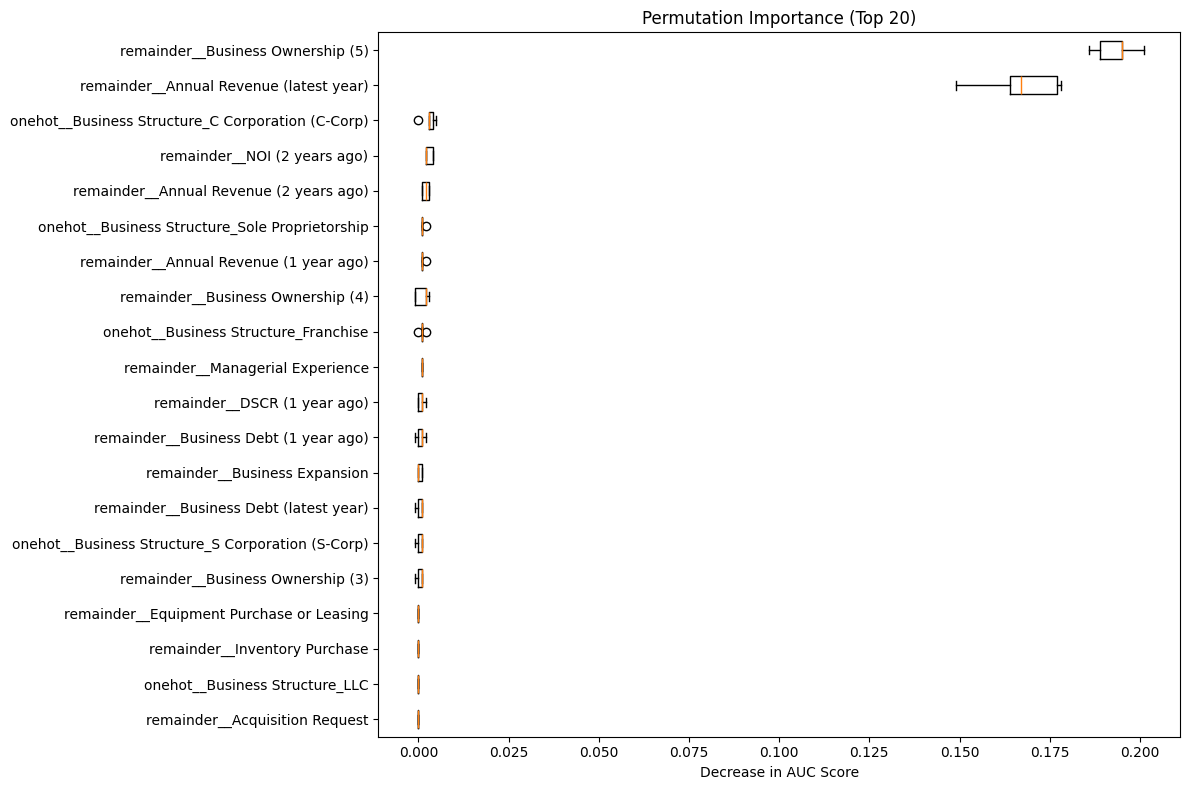

In [24]:
# 1. XGBoost Built-in Feature Importance (Global)
import matplotlib.pyplot as plt

# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Plot importance
plt.figure(figsize=(12, 8))
xgb = best_xgb.named_steps['xgb']
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx][-20:], xgb.feature_importances_[sorted_idx][-20:])
plt.title("XGBoost Feature Importance (Top 20)")
plt.xlabel("F-score Importance")
plt.tight_layout()
plt.show()

# 2. Permutation Importance (Global)
from sklearn.inspection import permutation_importance

# Use small subset for faster computation
sample_idx = np.random.choice(len(X_test), 1000, replace=False)
result = permutation_importance(best_xgb, X_test.iloc[sample_idx], y_test.iloc[sample_idx],
                               n_repeats=5, random_state=42, n_jobs=-1)

# Plot top 20 features
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[sorted_idx][-20:].T,
           vert=False, labels=feature_names[sorted_idx][-20:])
plt.title("Permutation Importance (Top 20)")
plt.xlabel("Decrease in AUC Score")
plt.tight_layout()
plt.show()

In [25]:
import numpy as np
import pandas as pd

# Scale the probabilities to 0-100% range
def scale_probabilities(probabilities):
    """
    Scale probability values to 0-100% range where:
    - Minimum probability becomes 0%
    - Maximum probability becomes 100%
    """
    return 100 * (probabilities - np.min(probabilities)) / (np.max(probabilities) - np.min(probabilities))

# Scale the existing probabilities from your model
scaled_scores = scale_probabilities(y_proba)

# Create a DataFrame to visualize the transformation
results_df = pd.DataFrame({
    'Original Probability': y_proba,
    'Scaled Score': scaled_scores
})

# Display sample of results
print("Sample of Scaled Results:")
print(results_df.head(10))

# Function to persist scaling parameters for future predictions
def get_scaling_params(y_proba):
    """Store min/max values to apply consistent scaling to new predictions"""
    return {
        'min_prob': np.min(y_proba),
        'max_prob': np.max(y_proba)
    }

# Save scaling parameters for future use
scaling_params = get_scaling_params(y_proba)

# Function to apply scaling to new predictions
def scale_new_predictions(new_proba, scaling_params):
    """Apply the same scaling to new predictions"""
    return 100 * (new_proba - scaling_params['min_prob']) / (scaling_params['max_prob'] - scaling_params['min_prob'])

# Example: How to use for new data
def predict_with_scaling(model, new_data, scaling_params):
    """Make predictions and apply scaling"""
    # Get raw probabilities from model
    raw_probs = model.predict_proba(new_data)[:, 1]
    
    # Apply scaling
    scaled_scores = scale_new_predictions(raw_probs, scaling_params)
    
    return scaled_scores


Sample of Scaled Results:
   Original Probability  Scaled Score
0              0.612367     73.050171
1              0.657067     78.415184
2              0.618794     73.821609
3              0.583223     69.552284
4              0.586748     69.975372
5              0.620256     73.997017
6              0.601803     71.782249
7              0.601994     71.805168
8              0.616639     73.562965
9              0.045485      5.011642


In [26]:
# Get ORIGINAL feature names from training data
original_features = X.columns.tolist()

# Create sample input with ORIGINAL column structure
sample_input = pd.DataFrame(columns=original_features).fillna(0)

# Set values for your features
sample_input.at[0, 'Business Structure'] = 'LLC'
sample_input.at[0, 'Business Ownership (1)'] = 75
sample_input.at[0, 'Business Ownership (2)'] = 25
sample_input.at[0, 'Business Ownership (3)'] = 0
sample_input.at[0, 'Business Ownership (4)'] = 0
sample_input.at[0, 'Business Ownership (5)'] = 0
sample_input.at[0, 'Annual Revenue (2 years ago)'] = 3500000
sample_input.at[0, 'Annual Revenue (1 year ago)'] = 4200000
sample_input.at[0, 'Annual Revenue (latest year)'] = 4800000
sample_input.at[0, 'Net Profit Margin'] = 22.5
sample_input.at[0, 'Business Debt (2 years ago)'] = 1200000
sample_input.at[0, 'Business Debt (1 year ago)'] = 900000
sample_input.at[0, 'Business Debt (latest year)'] = 600000
sample_input.at[0, 'NOI (2 years ago)'] = 850000
sample_input.at[0, 'NOI (1 year ago)'] = 920000
sample_input.at[0, 'NOI (latest year)'] = 1100000
sample_input.at[0, 'DSCR (2 years ago)'] = 1.3
sample_input.at[0, 'DSCR (1 year ago)'] = 1.4
sample_input.at[0, 'DSCR (latest year)'] = 1.6
sample_input.at[0, 'Managerial Experience'] = 8
sample_input.at[0, 'Years in Business'] = 5
sample_input.at[0, 'Collateral Availability'] = 1
sample_input.at[0, 'Acquisition Request'] = 0
sample_input.at[0, 'Working Capital'] = 0
sample_input.at[0, 'Business Expansion'] = 1
sample_input.at[0, 'Equipment Purchase or Leasing'] = 1
sample_input.at[0, 'Inventory Purchase'] = 0
sample_input.at[0, 'Real Estate Acquisition or Improvement'] = 0
sample_input.at[0, 'Business Acquisition or Buyout'] = 0
sample_input.at[0, 'Refinancing Existing Debt'] = 0
sample_input.at[0, 'Emergency Funds'] = 1
sample_input.at[0, 'Franchise Financing'] = 0
sample_input.at[0, 'Contract Financing'] = 0
sample_input.at[0, 'Licensing or Permits'] = 1
sample_input.at[0, 'Line of Credit Establishment'] = 0

# Convert to correct data types
sample_input = sample_input.astype(X.dtypes)

# Make prediction
raw_prob = best_xgb.predict_proba(sample_input)[0][1]

# Scale probabilities
scaling_params = {
    'min_prob': np.min(y_proba),
    'max_prob': np.max(y_proba)
}

scaled_score = 100 * (raw_prob - scaling_params['min_prob']) / (scaling_params['max_prob'] - scaling_params['min_prob'])
scaled_score = np.clip(scaled_score, 0, 100)

print(f"Raw Probability: {raw_prob:.4f}")
print(f"Scaled Eligibility Score: {scaled_score:.1f}")


Raw Probability: 0.6190
Scaled Eligibility Score: 73.9


In [23]:
import pickle

# Save the model to a file
with open('best_xgb.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)